In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv "
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0


In [3]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [4]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [5]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [7]:
top4_df = df.loc[(df['SizeRank'])[0:4]]

In [8]:
top4_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [9]:
melted = pd.melt(top4_df,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType','StateName','State','Metro','CountyName'] )
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,variable,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [10]:
melted = pd.melt(top4_df.drop(columns=['SizeRank','StateName','RegionID']),
                 id_vars=['RegionName','RegionType','State','Metro','CountyName'],
                value_name='Confirmed',var_name="Date")
melted

,RegionName,RegionType,State,Metro,CountyName,Date,Confirmed
0,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,Los Angeles,city,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,Houston,city,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,Chicago,city,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...
1087,Chicago,city,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,Los Angeles,city,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,Houston,city,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [11]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   RegionType  1092 non-null   object        
 2   State       1092 non-null   object        
 3   Metro       1092 non-null   object        
 4   CountyName  1092 non-null   object        
 5   Date        1092 non-null   datetime64[ns]
 6   Confirmed   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 59.8+ KB


In [12]:
melted = melted.set_index("Date")
melted

,RegionName,RegionType,State,Metro,CountyName,Confirmed
Date,,,,,,
2000-01-31,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,Los Angeles,city,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,Houston,city,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,Chicago,city,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...
2022-08-31,Chicago,city,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,New York,city,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,Los Angeles,city,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [13]:
melted['RegionName'].nunique()

4

In [14]:
melted.resample("M").sum()

/var/folders/lk/ky72q70x07dg6dkvyns7_9480000gn/T/ipykernel_21208/3304846072.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melted.resample("M").sum()


,Confirmed
Date,
2000-01-31,763078.0
2000-02-29,765533.0
2000-03-31,768966.0
2000-04-30,775606.0
2000-05-31,782650.0
...,...
2022-05-31,2337233.0
2022-06-30,2349845.0
2022-07-31,2357291.0


In [15]:
df_ts = melted.groupby('RegionName').resample("M").sum()
df_ts

/var/folders/lk/ky72q70x07dg6dkvyns7_9480000gn/T/ipykernel_21208/2520910870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
/var/folders/lk/ky72q70x07dg6dkvyns7_9480000gn/T/ipykernel_21208/2520910870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
/var/folders/lk/ky72q70x07dg6dkvyns7_9480000gn/T/ipykernel_21208/2520910870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify nume

Confirmed
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

In [16]:
df_ts.head().index

MultiIndex([('Chicago', '2000-01-31'),
            ('Chicago', '2000-02-29'),
            ('Chicago', '2000-03-31'),
            ('Chicago', '2000-04-30'),
            ('Chicago', '2000-05-31')],
           names=['RegionName', 'Date'])

In [17]:
df_ts.loc['New York']

,Confirmed
Date,
2000-01-31,253690.0
2000-02-29,255517.0
2000-03-31,257207.0
2000-04-30,260310.0
2000-05-31,263204.0
...,...
2022-05-31,768797.0
2022-06-30,773944.0
2022-07-31,777692.0


# Part 2


In [18]:
cities = ['New York','Los Angeles','Houston','Chicago']
plot_df = df_ts.loc[cities].copy()
plot_df

Confirmed
RegionName Date                 
New York   2000-01-31   253690.0
           2000-02-29   255517.0
           2000-03-31   257207.0
           2000-04-30   260310.0
           2000-05-31   263204.0
...                          ...
Chicago    2022-05-31   312487.0
           2022-06-30   314663.0
           2022-07-31   315910.0
           2022-08-31   315587.0
           2022-09-30   315429.0

[1092 rows x 1 columns]

In [19]:
plot_df.index.get_level_values(0)

Index(['New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York',
       ...
       'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago'],
      dtype='object', name='RegionName', length=1092)

In [20]:
# level 1 is Date
plot_df.index.get_level_values(1)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [21]:
unstacked = plot_df.unstack(level=0)
unstacked

Confirmed                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

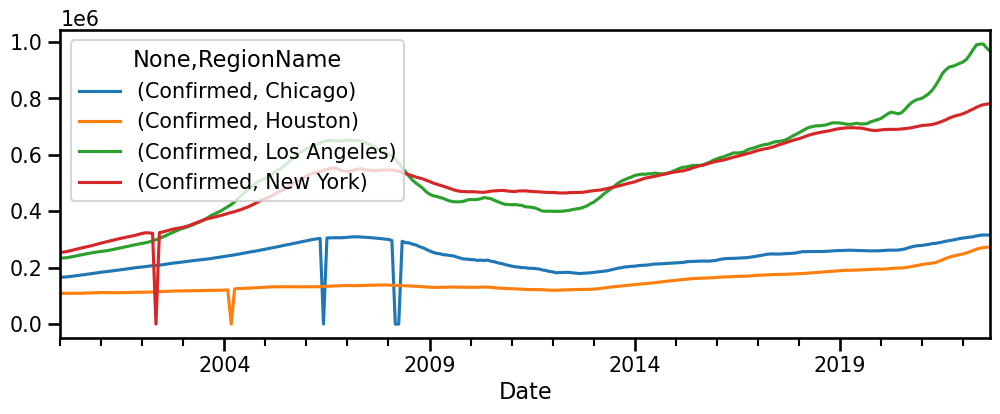

In [22]:
ax = unstacked.plot()

In [23]:
unstacked.columns

MultiIndex([('Confirmed',     'Chicago'),
            ('Confirmed',     'Houston'),
            ('Confirmed', 'Los Angeles'),
            ('Confirmed',    'New York')],
           names=[None, 'RegionName'])

In [24]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)

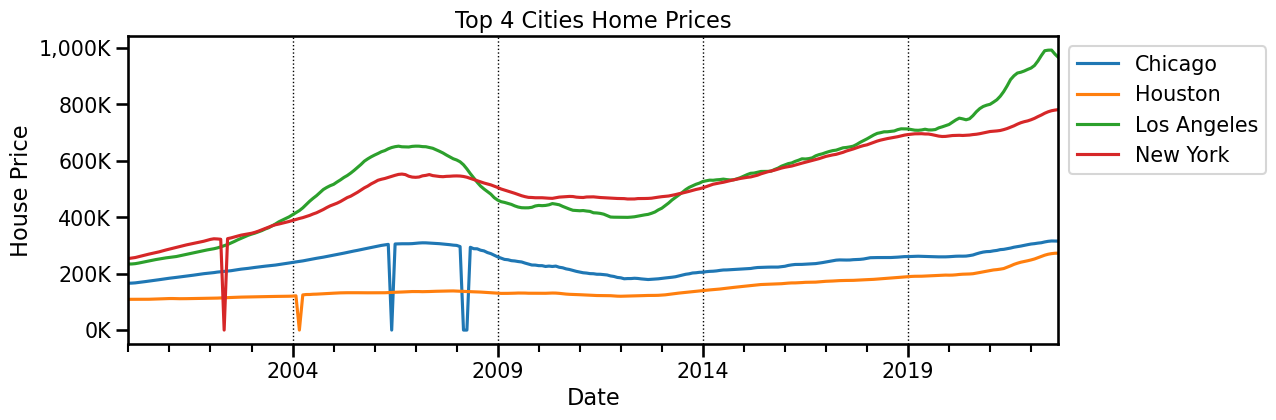

In [25]:
ax = unstacked['Confirmed'].plot()
ax.set(ylabel="House Price", title='Top 4 Cities Home Prices')
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)
ax.yaxis.set_major_formatter(fmt_thous)
ax.legend(bbox_to_anchor=[1,1])

### 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [28]:
df_ts.loc[pd.IndexSlice[:, '2008'],:]

Confirmed
RegionName  Date                 
Chicago     2008-01-31   300207.0
            2008-02-29   296063.0
            2008-03-31        0.0
            2008-04-30        0.0
            2008-05-31   293467.0
            2008-06-30   288495.0
            2008-07-31   288174.0
            2008-08-31   283199.0
            2008-09-30   280695.0
            2008-10-31   274849.0
            2008-11-30   271059.0
            2008-12-31   265306.0
Houston     2008-01-31   138208.0
            2008-02-29   137512.0
            2008-03-31   136795.0
            2008-04-30   136628.0
            2008-05-31   136228.0
            2008-06-30   135773.0
            2008-07-31   135392.0
            2008-08-31   134770.0
            2008-09-30   133932.0
            2008-10-31   133189.0
            2008-11-30   132247.0
            2008-12-31   131283.0
Los Angeles 2008-01-31   603029.0
            2008-02-29   596635.0
            2008-03-31   586065.0
            2008-04-30   571226.0
            2008-05-31   554589.0
            2008-06-30   539622.0
            2008-07-31   524220.0
            2008-08-31   510520.0
            2008-09-30   500124.0
            2008-10-31   490979.0
            2008-11-30   481905.0
            2008-12-31   469294.0
New York    2008-01-31   546538.0
            2008-02-29   546098.0
            2008-03-31   544562.0
            2008-04-30   541865.0
            2008-05-31   537685.0
            2008-06-30   533810.0
            2008-07-31   529211.0
            2008-08-31   525290.0
            2008-09-30   521347.0
            2008-10-31   518048.0
            2008-11-30   514767.0
            2008-12-31   510309.0

#### The Highest home value at the end of 2008 was New York and the lowest was Houston.

### 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [27]:
# Calculate the diff between November 2008 to Dec 2008


NameError: name 'max2008' is not defined